In [1]:
import pandas as pd
import glob
import os
import re

import re
import pandas as pd
import os
import pytz
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import warnings
import matplotlib.gridspec as gridspec
import itertools
import calendar
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
from IPython.display import display

in_color = 'blue'
out_color = 'green'
ratio_color = 'black'

In [4]:
# Define custom positions for boxplots: Two close, then a gap
def generate_positions(n_groups, spacing=2.2, inner_spacing=0.8):
    positions = []
    base = 1  # Start position
    for _ in range(n_groups):
        positions.append(base)  # First box in pair
        positions.append(base + inner_spacing)  # Second box in pair
        base += spacing  # Larger gap before next pair
    return positions

def set_box_outline_colors(box, colors):
    color_cycle = itertools.cycle(colors)
    for patch in box['boxes']:
        patch.set(color=next(color_cycle))  # Set box outline color
    colors = [colors[0], colors[0], colors[1], colors[1]]
    color_cycle = itertools.cycle(colors)
    for whisker in box['whiskers']:  # Set whisker colors
        whisker.set(color=next(color_cycle))
    for cap in box['caps']:  # Set cap colors
        cap.set(color=next(color_cycle))
    for median in box['medians']:  # Make median lines black for contrast
        median.set(color="red")


####  Monthly average of calibrated data

In [3]:
## I/O Time dinural (full)
## plotting

dir = 'hourly_averages'
savedir = 'graphs/monthly average'

files = [f for f in os.listdir(dir) if f.endswith('.csv')]

urban = ['U1.csv', 'U2.csv']
suburb = ['SU1.csv', 'SU2.csv']
rural = ['R1.csv', 'R2.csv', 'R3.csv', 'R4.csv']

categories = [
    (urban, "Urban"), 
    (suburb, "Suburban"), 
    (rural, "Rural")]

i = 1
for category, name in categories:
    plt.figure(figsize=(6, 4))
    colors = ["blue", 'green', 'red', 'orange']
    for i, file in enumerate(category):
        print(f"processing {file}")
        file_path = os.path.join(dir, file)
        df = pd.read_csv(file_path, parse_dates=['time'])

        # Extract month numbers for grouping
        df['Month'] = df['time'].dt.month

        all_months = [i for i in range(1, 13)]

        # Calculate monthly average PM2.5 concentrations
        monthly_avg = df.groupby('Month')['pm2_5_atm_calibrated'].mean().reindex(all_months, fill_value=float('nan'))

        # Get month names instead of numbers
        month_labels = [calendar.month_name[m] for m in monthly_avg.index]  # Convert 1-12 to month names

        # Define X-axis positions
        x = np.arange(len(month_labels))  

        # Plot bar chart
        width = 0.15

        plt.bar(x - width/2 + width * i, monthly_avg, width=width, label=file.split('.')[0], alpha=0.7, color=colors[i])
        # plt.plot(x - width/2 + width * i, monthly_avg,color=colors[i], marker = 'o')

    # Labels and title
    plt.xlabel("Month")
    plt.ylabel(r"Average $PM_{2.5}$ Concentration ($\mu g/m^3$)")
    plt.title(r"Monthly Average $PM_{2.5}$ Concentration")

    # Set month names as x-axis labels
    plt.xticks(x, month_labels, rotation=45)  # Set proper month labels with rotation
    plt.ylim((0, 220))
    plt.text(4, 200, name, fontsize = 12, fontweight = "bold")
    plt.legend()
    # plt.grid(axis='y')
    # Show the plot

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.25, hspace=0.6)
    # plt.savefig(f'graphs/monthly average/merged/{home}.png', dpi = 300)
    plt.show()
            

processing U1.csv


KeyError: 'Column not found: pm2_5_atm_calibrated'

<Figure size 600x400 with 0 Axes>

processing U1.csv
processing U2.csv
processing SU1.csv
processing SU2.csv
processing R1.csv
processing R2.csv
processing R3.csv
processing R4.csv


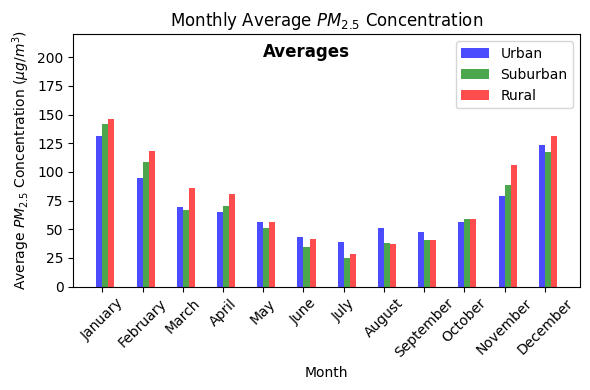

In [ ]:
## I/O Time dinural (full)
## plotting

dir = 'hourly_averages'
savedir = 'graphs/monthly average'

files = [f for f in os.listdir(dir) if f.endswith('.csv')]

urban = ['U1.csv', 'U2.csv']
suburb = ['SU1.csv', 'SU2.csv']
rural = ['R1.csv', 'R2.csv', 'R3.csv', 'R4.csv']

categories = [
    (urban, "Urban"), 
    (suburb, "Suburban"), 
    (rural, "Rural")]


plt.figure(figsize=(6, 4))
colors = ["blue", 'green', 'red', 'orange']

for i, (category, name) in enumerate(categories):
    dfs = []
    for file in category:
        print(f"processing {file}")
        file_path = os.path.join(dir, file)
        df = pd.read_csv(file_path, parse_dates=['time'])
        dfs.append(df)

    df = pd.concat(dfs, ignore_index=True).reset_index(drop=True)
    # Extract month numbers for grouping
    df['Month'] = df['time'].dt.month

    all_months = [i for i in range(1, 13)]

    # Calculate monthly average PM2.5 concentrations
    monthly_avg = df.groupby('Month')['pm2_5_atm_calibrated'].mean().reindex(all_months, fill_value=float('nan'))

    # Get month names instead of numbers
    month_labels = [calendar.month_name[m] for m in monthly_avg.index]  # Convert 1-12 to month names

    # Define X-axis positions
    x = np.arange(len(month_labels))  

    # Plot bar chart
    width = 0.15

    plt.bar(x - width/2 + width * i, monthly_avg, width=width, label=name, alpha=0.7, color=colors[i])
    # plt.plot(x - width/2 + width * i, monthly_avg,color=colors[i], marker = 'o')

# Labels and title
plt.xlabel("Month")
plt.ylabel(r"Average $PM_{2.5}$ Concentration ($\mu g/m^3$)")
plt.title(r"Monthly Average $PM_{2.5}$ Concentration")

# Set month names as x-axis labels
plt.xticks(x, month_labels, rotation=45)  # Set proper month labels with rotation
plt.ylim((0, 220))
plt.text(4, 200, "Averages", fontsize = 12, fontweight = "bold")
plt.legend()
# plt.grid(axis='y')
# Show the plot

plt.tight_layout()
plt.subplots_adjust(wspace=0.25, hspace=0.6)
# plt.savefig(f'graphs/monthly average/merged/{home}.png', dpi = 300)
plt.show()
            

#### Boxplots

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# =======================
# LOAD & SPLIT
# =======================
dry_pm1_list, dry_pm25_list, dry_pm10_list = [], [], []
wet_pm1_list, wet_pm25_list, wet_pm10_list = [], [], []
labels = []

dir = 'hourly_averages'
files = [f for f in os.listdir(dir) if f.endswith('.csv')]

for file in tqdm(files):
    print(f'Processing {file}')
    df = pd.read_csv(os.path.join(dir, file))
    df['time'] = pd.to_datetime(df['time'])

    # Dry season: October–March | Wet season: April–September
    dry = df[df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])]
    wet = df[df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])]

    dry_pm1_list.append(dry['pm1_0_atm'].dropna().to_numpy())
    dry_pm25_list.append(dry['pm2_5_atm'].dropna().to_numpy())
    dry_pm10_list.append(dry['pm10_0_atm'].dropna().to_numpy())

    wet_pm1_list.append(wet['pm1_0_atm'].dropna().to_numpy())
    wet_pm25_list.append(wet['pm2_5_atm'].dropna().to_numpy())
    wet_pm10_list.append(wet['pm10_0_atm'].dropna().to_numpy())

    labels.append(file.split('.')[0])

# =======================
# PLOTTING
# =======================

n_stations = len(labels)

# 3 boxes per station (cluster) and a gap between stations
cluster_spacing = 1.4                    # controls gap between station clusters
base = np.arange(n_stations) * cluster_spacing
offsets = np.array([-0.35, 0.0, 0.35])   # positions of pm1, pm2.5, pm10 within a cluster
width_box = 0.3                          # keep the same box width as before

fig, (ax_wet, ax_dry) = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Colorblind-safe colors for pollutants (same in both subplots)
c_pm1  = "#009E73"  # green
c_pm25 = "#56B4E9"  # blue
c_pm10 = "#E69F00"  # orange
metric_colors = [c_pm1, c_pm25, c_pm10]

def plot_season(ax, arrays_by_metric, title, legend = True):
    # Flatten data & positions in plotting order (pm1, pm2.5, pm10) for each station
    data, positions, colors_for_boxes = [], [], []
    for i in range(n_stations):
        for j in range(3):
            data.append(arrays_by_metric[j][i])
            positions.append(base[i] + offsets[j])
            colors_for_boxes.append(metric_colors[j])

    bp = ax.boxplot(
        data,
        positions=positions,
        widths=width_box,
        patch_artist=True,
        boxprops=dict(color="black"),
        medianprops=dict(color="black"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
        flierprops=dict(markeredgecolor="black", markersize=4),
        showfliers=False,
        showmeans=True,
        meanprops=dict(markeredgecolor='black', markerfacecolor='yellow')
    )

    # Apply face colors per pollutant while keeping other features unchanged
    for patch, fc in zip(bp['boxes'], colors_for_boxes):
        patch.set_facecolor(fc)
        patch.set_edgecolor("black")

    ax.set_xticks(base)
    ax.set_xticklabels(labels, rotation=45, ha="right")
    ax.set_title(title)
    ax.grid(axis="y", linestyle="--", alpha=0.6)

    # Legend for pollutants (same in both subplots)
    handles = [
        plt.Line2D([0], [0], color=c_pm1,  lw=6, label="PM1.0"),
        plt.Line2D([0], [0], color=c_pm25, lw=6, label="PM2.5"),
        plt.Line2D([0], [0], color=c_pm10, lw=6, label="PM10"),
    ]
    if legend:
        ax.legend(handles=handles, loc="upper right")

# Wet and Dry subplots (3 metrics per station in each)
plot_season(ax_wet, [wet_pm1_list, wet_pm25_list, wet_pm10_list], "Wet Season")
plot_season(ax_dry, [dry_pm1_list, dry_pm25_list, dry_pm10_list], "Dry Season", False)

ax_wet.set_ylabel("PM Concentration (µg/m³)")
fig.suptitle("Dry vs Wet Season Concentrations")
plt.tight_layout()
plt.show()


In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# ----------------------------
# CONFIG
# ----------------------------
DATA_DIR = "hourly_averages"             # R1,R2,R3,R4,SU1,SU2,U1,U2
START = "2023-07-01"
END   = "2025-06-30"                      # inclusive month range end
months = pd.date_range(START, END, freq="MS")  # 24 months

# Category colors (same in all subplots)
COLOR_RURAL    = "#E69F00"   # orange
COLOR_SUBURBAN = "#009E73"   # green/teal
COLOR_URBAN    = "#56B4E9"   # blue
CAT_COLORS = {"Rural": COLOR_RURAL, "Suburban": COLOR_SUBURBAN, "Urban": COLOR_URBAN}

# Pollutants to plot (title, column name, y-label)
POLLUTANTS = [
    ("PM$_{1.0}$", "pm1_0_atm",  r"PM$_{1.0}$ (µg m$^{-3}$)"),
    ("PM$_{2.5}$", "pm2_5_atm",  r"PM$_{2.5}$ (µg m$^{-3}$)"),
    ("PM$_{10}$",  "pm10_0_atm", r"PM$_{10}$ (µg m$^{-3}$)"),
]

# ----------------------------
# HELPERS
# ----------------------------
def station_category(fname: str) -> str:
    base = os.path.splitext(fname)[0].upper()
    if base.startswith("SU"):
        return "Suburban"
    if base.startswith("U"):
        return "Urban"
    if base.startswith("R"):
        return "Rural"
    return "Other"

def monthly_means_for_column(col_name: str):
    """Return category-wise monthly averages (Series over `months`) for a single column."""
    buckets = {"Rural": [], "Suburban": [], "Urban": []}
    files = [f for f in os.listdir(DATA_DIR) if f.lower().endswith(".csv")]

    for f in tqdm(sorted(files), desc=f"Loading {col_name}"):
        cat = station_category(f)
        if cat not in buckets:
            continue
        df = pd.read_csv(os.path.join(DATA_DIR, f))
        df["time"] = pd.to_datetime(df["time"], errors="coerce")
        df = df.dropna(subset=["time"])
        df = df[(df["time"] >= START) &
                (df["time"] <= pd.to_datetime(END) + pd.offsets.MonthEnd(0))]

        s = (
            df.set_index("time")[col_name]
            .astype(float)
            .resample("MS").mean()
            .reindex(months)
        )
        buckets[cat].append(s)

    def avg(list_of_series):
        if not list_of_series:
            return pd.Series(index=months, dtype=float)
        return pd.concat(list_of_series, axis=1).mean(axis=1, skipna=True)

    return {
        "Rural":    avg(buckets["Rural"]),
        "Suburban": avg(buckets["Suburban"]),
        "Urban":    avg(buckets["Urban"]),
    }

# ----------------------------
# BUILD DATA FOR EACH POLLUTANT
# ----------------------------
series_by_pollutant = {}
for _, col_name, _ in POLLUTANTS:
    series_by_pollutant[col_name] = monthly_means_for_column(col_name)

# ----------------------------
# PLOT: 3 subplots stacked (monthly grouped bars R/SU/U)
# ----------------------------
x = np.arange(len(months))
bar_w = 0.25
offsets = np.array([-bar_w, 0.0, bar_w])  # Rural, Suburban, Urban within each month cluster

fig, axes = plt.subplots(3, 1, figsize=(14, 10), sharex=True)

for ax, (title, col_name, ylabel) in zip(axes, POLLUTANTS):
    rural    = series_by_pollutant[col_name]["Rural"].values
    suburban = series_by_pollutant[col_name]["Suburban"].values
    urban    = series_by_pollutant[col_name]["Urban"].values

    ax.bar(x + offsets[0], rural,    width=bar_w, label="Rural",
           color=CAT_COLORS["Rural"], edgecolor="black")
    ax.bar(x + offsets[1], suburban, width=bar_w, label="Suburban",
           color=CAT_COLORS["Suburban"], edgecolor="black")
    ax.bar(x + offsets[2], urban,    width=bar_w, label="Urban",
           color=CAT_COLORS["Urban"], edgecolor="black")

    # Year separators (vertical lines at Jan 2024 & Jan 2025)
    for yr in [2024, 2025]:
        idx = np.where(months == pd.Timestamp(f"{yr}-01-01"))[0]
        if len(idx) > 0:
            ax.axvline(idx[0] - 0.5, color="black", linewidth=1)

    ax.set_ylabel(ylabel)
    ax.set_ylim((0, 200))
    ax.set_title(title, loc="center")
    ax.grid(axis="y", linestyle="--", alpha=0.6)
axes[0].legend(loc="upper right")

# Bottom axis formatting
month_labels = [d.strftime("%b") for d in months]
axes[-1].set_xticks(x)
axes[-1].set_xticklabels(month_labels, rotation=90)
axes[-1].set_xlabel("Month")

# Annotate year labels at the very top subplot (optional)
axes[0].text(np.where(months.year == 2023)[0].mean(), axes[0].get_ylim()[1]*0.98, "2023",
             ha="center", va="top")
axes[0].text(np.where(months.year == 2024)[0].mean(), axes[0].get_ylim()[1]*0.98, "2024",
             ha="center", va="top")
axes[0].text(np.where(months.year == 2025)[0].mean(), axes[0].get_ylim()[1]*0.98, "2025",
             ha="center", va="top")

fig.suptitle("Monthly Average PM Concentrations by Urbanicity (Jul 2023 – Jun 2025)", y=0.995)
plt.tight_layout()
plt.show()


#### Diurnals

##### diurnal 1

In [ ]:
# Requirements: pandas, matplotlib
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # proxy handles for the global legend

# 1) Data directory
data_dir = 'hourly_averages'  # as before

# 2) Helper: map filename (without extension) to zone
def station_to_zone(station_name: str) -> str:
    s = station_name.upper()
    if s.startswith('SU'):
        return 'suburban'
    elif s.startswith('R'):
        return 'rural'
    elif s.startswith('U'):
        return 'urban'
    else:
        return 'unknown'

# 3) Read and combine all CSVs, tagging each row with zone, hour (1..24) and SEASON
all_records = []
csv_paths = glob.glob(os.path.join(data_dir, '*.csv'))
if not csv_paths:
    raise FileNotFoundError(f"No CSV files found in {os.path.abspath(data_dir)}")

for path in csv_paths:
    station = os.path.splitext(os.path.basename(path))[0]
    zone = station_to_zone(station)
    if zone == 'unknown':
        continue

    df = pd.read_csv(path)
    if 'time' not in df.columns:
        continue

    df['time'] = pd.to_datetime(df['time'], errors='coerce')
    df = df.dropna(subset=['time'])

    # hour of day (1..24)
    df['hour'] = df['time'].dt.hour  # 0..23
    df['hour_1_24'] = np.where(df['hour'] == 0, 24, df['hour'])

    # season by month
    month = df['time'].dt.month
    df['season'] = np.where(month.between(4, 9), 'Wet', 'Dry')  # Apr–Sep => Wet; Oct–Mar => Dry

    present = ['hour_1_24', 'season'] + [c for c in ['pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm'] if c in df.columns]
    df = df[present].copy()
    df['zone'] = zone

    all_records.append(df)

if not all_records:
    raise RuntimeError("No valid data rows found after reading the CSV files.")

data = pd.concat(all_records, ignore_index=True)

# 4) Compute diurnal means by SEASON, zone and hour (across all stations & days)
grouped = (
    data.groupby(['season', 'zone', 'hour_1_24'])[['pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm']]
        .mean()
        .reset_index()
)

# Ensure every hour 1..24 exists for each season & zone
hours = pd.DataFrame({'hour_1_24': list(range(1, 25))})
zones = ['urban', 'suburban', 'rural']
seasons = ['Wet', 'Dry']
complete = []
for s in seasons:
    for z in zones:
        zdf = grouped[(grouped['season'] == s) & (grouped['zone'] == z)].merge(hours, on='hour_1_24', how='right')
        zdf['zone'] = z
        zdf['season'] = s
        complete.append(zdf)
grouped_full = pd.concat(complete, ignore_index=True)

# 5) Helper to build wide data (by season) for plotting
def pivot_for_plot(df, pollutant, season_tag):
    sdf = df[df['season'] == season_tag]
    wide = sdf.pivot_table(index='hour_1_24', columns='zone', values=pollutant)
    wide = wide.reindex(range(1, 25))
    for z in zones:
        if z not in wide.columns:
            wide[z] = np.nan
    return wide[zones]

# Precompute per-season wide frames (guard if columns missing)
has_pm1  = 'pm1_0_atm'  in grouped_full.columns
has_pm25 = 'pm2_5_atm'  in grouped_full.columns
has_pm10 = 'pm10_0_atm' in grouped_full.columns

data_wide = {
    'Wet': {
        'PM1.0':  pivot_for_plot(grouped_full, 'pm1_0_atm',  'Wet')  if has_pm1  else None,
        'PM2.5':  pivot_for_plot(grouped_full, 'pm2_5_atm',  'Wet')  if has_pm25 else None,
        'PM10.0': pivot_for_plot(grouped_full, 'pm10_0_atm', 'Wet')  if has_pm10 else None,
    },
    'Dry': {
        'PM1.0':  pivot_for_plot(grouped_full, 'pm1_0_atm',  'Dry')  if has_pm1  else None,
        'PM2.5':  pivot_for_plot(grouped_full, 'pm2_5_atm',  'Dry')  if has_pm25 else None,
        'PM10.0': pivot_for_plot(grouped_full, 'pm10_0_atm', 'Dry')  if has_pm10 else None,
    }
}

# 6) Plotting: TWO ROWS (Wet on top, Dry at bottom), three pollutants per row
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharex=True, sharey=True)

col_titles = ['PM1.0', 'PM2.5', 'PM10.0']
row_titles = ['Wet Season (Apr–Sep)', 'Dry Season (Oct–Mar)']

for r, season_tag in enumerate(seasons):  # 0: Wet, 1: Dry
    for c, title in enumerate(col_titles):
        ax = axes[r, c]
        dfw = data_wide[season_tag][title]

        if dfw is None:
            ax.text(0.5, 0.5, f'{title} data missing', ha='center', va='center', fontsize=10)
            ax.set_axis_off()
            continue

        # draw lines; remove subplot legends
        dfw.plot(ax=ax, linewidth=2, legend=False)

        # Titles only for first row
        if r == 0:
            ax.set_title(title)
        else:
            ax.set_title("")  # No title for second row

        if c == 0:
            if r == 0:
                ax.set_ylabel(r'$\bf{Wet\ Season\ (Apr–Sep)}$' + '\n' + r'Concentration ($\mu g/m^3$)')
            if r == 1:
                ax.set_ylabel(r'$\bf{Dry\ Season\ (Oct–Mar)}$' + '\n' + r'Concentration ($\mu g/m^3$)')
        ax.set_xlabel('Hour of Day (1–24)')
        ax.set_xticks(range(1, 25, 2))
        ax.grid(True, alpha=0.3)

        # Guideline lines only for PM2.5 and PM10.0
        if title == "PM2.5":
            ax.axhline(y=15,  linestyle='--', linewidth=2, color='black', zorder=-5)
            ax.axhline(y=65,  linestyle=':',  linewidth=2, color='black', zorder=-5)
        elif title == "PM10.0":
            ax.axhline(y=45,  linestyle='--', linewidth=2, color='black', zorder=-5)
            ax.axhline(y=150, linestyle=':',  linewidth=2, color='black', zorder=-5)

# # --- Add vertically oriented row labels (to the left of y-axis) ---
# for r, title in enumerate(row_titles):
#     fig.text(0.04, 0.7 - 0.43 * r, title, va='center', ha='center',
#              rotation='vertical', fontsize=11, weight='bold')

# --- GLOBAL LEGEND inside axes[0, 0] ---
zone_handles, zone_labels = axes[0, 0].get_legend_handles_labels()
who_proxy = Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='WHO Guideline')
bd_proxy  = Line2D([0], [0], color='black', linestyle=':',  linewidth=2, label='BD Standard')
handles = [Line2D([], [], color=plt.cm.tab10(i), lw=2, label=z) for i, z in enumerate(zones)] + [who_proxy, bd_proxy]

axes[0, 1].legend(handles=handles, loc='upper center', frameon=True, ncol=2)

plt.suptitle("Pollutant wise Diurnal Variation (Hourly Averages)", weight = "bold")
plt.tight_layout(rect=[0.05, 0, 1, 0.97])  # leave room for the vertical text and title
plt.show()

# Optional: save
# fig.savefig('diurnal_variation_wet_dry_updated.png', dpi=200, bbox_inches='tight')


##### diurnal 2

In [ ]:
# Requirements: pandas, matplotlib, numpy
import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------------------------
# 1) Config & helpers
# ---------------------------
data_dir = 'hourly_averages'   # as before

def station_to_zone(station_name: str) -> str:
    s = station_name.upper()
    if s.startswith('SU'):
        return 'suburban'
    elif s.startswith('R'):
        return 'rural'
    elif s.startswith('U'):
        return 'urban'
    return 'unknown'

def f_to_c(f):
    return (f - 32.0) * 5.0 / 9.0

# ---------------------------
# 2) Read all CSVs and prepare (+ season split)
# ---------------------------
all_records = []
for path in glob.glob(os.path.join(data_dir, '*.csv')):
    station = os.path.splitext(os.path.basename(path))[0]
    zone = station_to_zone(station)
    if zone == 'unknown':
        continue

    df = pd.read_csv(path)
    if 'time' not in df.columns:
        continue

    df['time'] = pd.to_datetime(df['time'], errors='coerce')
    df = df.dropna(subset=['time']).copy()
    df['hour'] = df['time'].dt.hour
    df['hour_1_24'] = np.where(df['hour'] == 0, 24, df['hour'])

    # season by month: Apr–Sep => Wet; Oct–Mar => Dry
    month = df['time'].dt.month
    df['season'] = np.where(month.between(4, 9), 'Wet', 'Dry')

    if 'current_temp_f' in df.columns:
        df['temp_c'] = f_to_c(df['current_temp_f'])
    if 'current_dewpoint_f' in df.columns:
        df['dewpoint_c'] = f_to_c(df['current_dewpoint_f'])

    value_cols = ['pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm',
                  'temp_c', 'dewpoint_c', 'current_humidity']
    present = ['hour_1_24', 'season'] + [c for c in value_cols if c in df.columns]
    df = df[present].copy()
    df = df.loc[:, ~df.columns.duplicated()].copy()

    df['zone'] = zone
    all_records.append(df)

if not all_records:
    raise RuntimeError('No valid rows after reading CSVs.')

data = pd.concat(all_records, ignore_index=True)

# ---------------------------
# 3) Aggregate: mean by season, zone & hour
# ---------------------------
agg_cols = [c for c in ['pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm',
                        'temp_c', 'dewpoint_c', 'current_humidity']
            if c in data.columns]

diurnal = (
    data.groupby(['season', 'zone', 'hour_1_24'], as_index=False)[agg_cols]
        .mean()
)

# Ensure hours 1..24 exist for each (season, zone)
hours = pd.DataFrame({'hour_1_24': list(range(1, 25))})
zones = ['urban', 'suburban', 'rural']
seasons = ['Wet', 'Dry']
full = []
for s in seasons:
    for z in zones:
        zdf = diurnal[(diurnal['season'] == s) & (diurnal['zone'] == z)].merge(
            hours, on='hour_1_24', how='right'
        )
        zdf['season'] = s
        zdf['zone'] = z
        full.append(zdf)
diurnal_full = pd.concat(full, ignore_index=True)

def Z(season, zone, col):
    filt = (diurnal_full['season'] == season) & (diurnal_full['zone'] == zone)
    z = diurnal_full[filt].set_index('hour_1_24')
    s = z[col] if col in z.columns else pd.Series(index=range(1,25), dtype=float)
    return s.reindex(range(1,25))

# ---------------------------
# 4) Plotting (two rows: Wet top, Dry bottom)
# ---------------------------
fig, axes = plt.subplots(2, 3, figsize=(18, 9), sharex=True, sharey=True)

x = np.arange(1, 25)
zone_titles = {'urban': 'Urban', 'suburban': 'Suburban', 'rural': 'Rural'}

# Bright colors for PM; muted for meteorology
pm_colors  = {'pm1': 'tab:blue', 'pm25': 'tab:orange', 'pm10': 'tab:green'}
met_colors = {'rh': '#6c757d', 'temp': '#9467bd', 'dew': '#8c564b'}  # gray, purple, brown

pm_handles = []
met_handles = []

for r, season in enumerate(seasons):           # r=0 Wet, r=1 Dry
    for c, zone in enumerate(zones):           # columns = zones
        ax = axes[r, c]

        # Titles only for the FIRST ROW
        if r == 0:
            ax.set_title(zone_titles[zone])
        else:
            ax.set_title("")

        # X labels only for the SECOND ROW
        if r == 1:
            ax.set_xlabel('Hour of Day (1–24)')
        else:
            ax.set_xlabel("")

        ax.set_xlim(1, 24)
        ax.set_ylim(10, 160)                   # PM fixed range
        ax.set_xticks(range(1, 25, 2))
        ax.grid(True, alpha=0.3)

        if c == 0:
            if r == 0:
                ax.set_ylabel(r'$\bf{Wet\ Season\ (Apr–Sep)}$' + '\n' + r'PM ($\mu g/m^3$)')
            if r == 1:
                ax.set_ylabel(r'$\bf{Dry\ Season\ (Oct–Mar)}$' + '\n' + r'PM ($\mu g/m^3$)')
        else:
            ax.set_ylabel(None)

        # PM curves
        p1, = ax.plot(x, Z(season, zone, 'pm1_0_atm'), color=pm_colors['pm1'],  linewidth=2, label='PM1.0')
        p2, = ax.plot(x, Z(season, zone, 'pm2_5_atm'), color=pm_colors['pm25'], linewidth=2, label='PM2.5')
        p3, = ax.plot(x, Z(season, zone, 'pm10_0_atm'), color=pm_colors['pm10'], linewidth=2, label='PM10')

        if not pm_handles:
            pm_handles = [p1, p2, p3]

        # RH axis (right, inner)
        ax_rh = ax.twinx()
        ax_rh.set_ylim(30, 70)                 # RH fixed range
        r1, = ax_rh.plot(x, Z(season, zone, 'current_humidity'),
                         color=met_colors['rh'], linestyle='--', linewidth=2, label='RH (%)')

        # Temp/Dewpoint axis (right, outer)
        ax_temp = ax.twinx()
        ax_temp.spines['right'].set_position(('axes', 1.12))
        ax_temp.set_frame_on(True); ax_temp.patch.set_visible(False)
        for sp in ax_temp.spines.values():
            sp.set_visible(True)
        ax_temp.set_ylim(15, 40)               # Temp/Dew fixed range
        t1, = ax_temp.plot(x, Z(season, zone, 'temp_c'),
                           color=met_colors['temp'], linestyle='--', linewidth=2, label='Temperature (°C)')
        d1, = ax_temp.plot(x, Z(season, zone, 'dewpoint_c'),
                           color=met_colors['dew'], linestyle='--', linewidth=2, label='Dewpoint (°C)')

        if not met_handles:
            met_handles = [r1, t1, d1]

        # Show RH/Temp axis labels only on rightmost subplot of EACH ROW
        if c == len(zones) - 1:
            ax_rh.set_ylabel('Relative Humidity (%)')
            ax_temp.set_ylabel('Temperature / Dewpoint (°C)')
        else:
            ax_rh.tick_params(labelright=False)
            ax_temp.tick_params(labelright=False)
            ax_rh.spines['right'].set_visible(False)
            ax_temp.spines['right'].set_visible(False)

# ---------------------------
# Vertically oriented row labels to the LEFT of y-labels
# ---------------------------
# Choose x slightly left of the y-label area; y positions at row centers.
# fig.subplots_adjust(left=0.05)  # ensure room on the left; keep rest unchanged
# fig.text(0.04, 0.74, 'Wet Season (Apr–Sep)', va='center', ha='center',
#          rotation='vertical', fontsize=11, weight='bold')
# fig.text(0.04, 0.26, 'Dry Season (Oct–Mar)', va='center', ha='center',
#          rotation='vertical', fontsize=11, weight='bold')

# ---------------------------
# Global legend (unchanged; outside subplots)
# ---------------------------
legend_handles = pm_handles + met_handles
legend_labels  = [h.get_label() for h in legend_handles]
fig.legend(legend_handles, legend_labels, ncol=2, frameon=True, borderpad=0.8)

plt.suptitle("Zone wise diurnals of Weather & PM (Hourly Averages)", weight = "bold")
plt.tight_layout(rect=[0.08, 0, 1, 0.98])  # leave room for left row labels and legend/supertitle
plt.show()

# Optional save:
# fig.savefig('zone_wise_diurnal_weather_pm_wet_dry_updated.png', dpi=200, bbox_inches='tight')


##### diurnal 3

In [ ]:
# Requirements: pandas, matplotlib
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # proxy legend handles

# 1) Data directory
data_dir = 'hourly_averages'

# 2) Helper: map filename to zone
def station_to_zone(station_name: str) -> str:
    s = station_name.upper()
    if s.startswith('SU'):
        return 'suburban'
    elif s.startswith('R'):
        return 'rural'
    elif s.startswith('U'):
        return 'urban'
    return 'unknown'

# 3) Read and tag all CSVs (add season)
all_records = []
csv_paths = glob.glob(os.path.join(data_dir, '*.csv'))
if not csv_paths:
    raise FileNotFoundError(f"No CSV files found in {os.path.abspath(data_dir)}")

for path in csv_paths:
    station = os.path.splitext(os.path.basename(path))[0]
    zone = station_to_zone(station)
    if zone == 'unknown':
        continue

    df = pd.read_csv(path)
    if 'time' not in df.columns:
        continue

    df['time'] = pd.to_datetime(df['time'], errors='coerce')
    df = df.dropna(subset=['time'])

    df['hour'] = df['time'].dt.hour
    df['hour_1_24'] = np.where(df['hour'] == 0, 24, df['hour'])
    df['weekday'] = df['time'].dt.dayofweek

    # Day type: Fri(4), Sat(5) = weekend
    df['day_type'] = np.where(df['weekday'].isin([4, 5]), 'weekend', 'weekday')

    # Season: Apr–Sep = Wet; Oct–Mar = Dry
    month = df['time'].dt.month
    df['season'] = np.where(month.between(4, 9), 'Wet', 'Dry')

    cols_needed = ['hour_1_24', 'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm', 'day_type', 'season']
    present = [c for c in cols_needed if c in df.columns]
    df = df[present].copy()
    df['zone'] = zone

    all_records.append(df)

data = pd.concat(all_records, ignore_index=True)

# 4) Compute mean per season, zone, day_type, and hour
grouped = (
    data.groupby(['season', 'zone', 'day_type', 'hour_1_24'])
    [['pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm']]
    .mean()
    .reset_index()
)

hours = pd.DataFrame({'hour_1_24': np.arange(1, 25)})
zones = ['urban', 'suburban', 'rural']
day_types = ['weekday', 'weekend']
seasons = ['Wet', 'Dry']

# ensure complete grid of hours for every season/zone/day_type
complete = []
for s in seasons:
    for z in zones:
        for d in day_types:
            temp = grouped[(grouped['season'] == s) & (grouped['zone'] == z) & (grouped['day_type'] == d)]
            temp = hours.merge(temp, on='hour_1_24', how='left')
            temp['zone'] = z
            temp['day_type'] = d
            temp['season'] = s
            complete.append(temp)
grouped_full = pd.concat(complete, ignore_index=True)

# 5) Pivot to make plotting easier (by season + day_type)
def pivot_zone(df, pollutant, season, day_type):
    temp = df[(df['season'] == season) & (df['day_type'] == day_type)]
    wide = temp.pivot_table(index='hour_1_24', columns='zone', values=pollutant)
    wide = wide.reindex(range(1, 25))
    for z in zones:
        if z not in wide.columns:
            wide[z] = np.nan
    return wide[zones]

def payload_for_pollutant(pollutant):
    return {
        'Wet': {
            'weekday': pivot_zone(grouped_full, pollutant, 'Wet', 'weekday'),
            'weekend': pivot_zone(grouped_full, pollutant, 'Wet', 'weekend'),
        },
        'Dry': {
            'weekday': pivot_zone(grouped_full, pollutant, 'Dry', 'weekday'),
            'weekend': pivot_zone(grouped_full, pollutant, 'Dry', 'weekend'),
        }
    }

pm1 = payload_for_pollutant('pm1_0_atm')
pm25 = payload_for_pollutant('pm2_5_atm')
pm10 = payload_for_pollutant('pm10_0_atm')

# 6) Plotting (two rows: Wet top, Dry bottom)
fig, axes = plt.subplots(2, 3, figsize=(15, 8), sharex=True, sharey=True)
colors = {'urban': 'tab:red', 'suburban': 'tab:blue', 'rural': 'tab:green'}

plots = [
    ('PM1.0', pm1, 0),
    ('PM2.5', pm25, 1),
    ('PM10.0', pm10, 2),
]

row_titles = ['Wet Season (Apr–Sep)', 'Dry Season (Oct–Mar)']

for r, season in enumerate(seasons):  # 0: Wet, 1: Dry
    for title, data_dict, c in plots:
        ax = axes[r, c]

        wd = data_dict[season]['weekday']
        we = data_dict[season]['weekend']

        # Plot all zones: weekday solid, weekend dashed
        for z in zones:
            ax.plot(wd.index, wd[z], label=f'{z.title()} (Weekday)',
                    color=colors[z], linewidth=2, alpha=1.0, linestyle='-')
            ax.plot(we.index, we[z], label=f'{z.title()} (Weekend)',
                    color=colors[z], linewidth=2, alpha=0.6, linestyle='--')

        # No xlabel for first row
        if r == 0:
            ax.set_xlabel("")
        else:
            ax.set_xlabel('Hour of Day (1–24)')

        # No titles for second row
        if r == 0:
            ax.set_title(title)
        else:
            ax.set_title("")

        if c == 0:
            if r == 0:
                ax.set_ylabel(r'$\bf{Wet\ Season\ (Apr–Sep)}$' + '\n' + r'Concentration ($\mu g/m^3$)')
            if r == 1:
                ax.set_ylabel(r'$\bf{Dry\ Season\ (Oct–Mar)}$' + '\n' + r'Concentration ($\mu g/m^3$)')
        ax.set_xticks(range(1, 25, 2))
        ax.grid(True, alpha=0.3)

        # Guideline lines
        if title == "PM2.5":
            ax.axhline(y=15, color='black', linestyle='--', linewidth=2, zorder=-5)
            ax.axhline(y=65, color='tab:gray', linestyle='-.', linewidth=2, zorder=-5)
        elif title == "PM10.0":
            ax.axhline(y=45, color='black', linestyle='--', linewidth=2, zorder=-5)
            ax.axhline(y=150, color='tab:gray', linestyle='-.', linewidth=2, zorder=-5)

# # --- Vertically oriented row labels (Wet/Dry) ---
# fig.subplots_adjust(left=0.10)
# fig.text(0.04, 0.74, 'Wet Season (Apr–Sep)', va='center', ha='center',
#          rotation='vertical', fontsize=11, weight='bold')
# fig.text(0.04, 0.26, 'Dry Season (Oct–Mar)', va='center', ha='center',
#          rotation='vertical', fontsize=11, weight='bold')

# --- GLOBAL LEGEND inside axes[0,1] with explicit left-to-right then next-line order ---
raw_handles, raw_labels = axes[0, 0].get_legend_handles_labels()

# Map labels -> handles
label_to_handle = {lab: h for h, lab in zip(raw_handles, raw_labels)}

# Desired serial order (left-to-right, then wrap to next line)
desired_order = [
    'Urban (Weekday)', 'Urban (Weekend)',
    'Suburban (Weekday)', 'Suburban (Weekend)',
    'Rural (Weekday)', 'Rural (Weekend)',
]

# Build ordered handles (skip any missing to be safe)
ordered_handles = [label_to_handle[l] for l in desired_order if l in label_to_handle]

# Append proxies for guidelines at the end
who_proxy = Line2D([0], [0], color='black', linestyle='--', linewidth=2, label='WHO Guideline')
bd_proxy  = Line2D([0], [0], color='tab:gray', linestyle='-.', linewidth=2, label='BD Standard')
ordered_handles += [who_proxy, bd_proxy]

axes[0, 1].legend(handles=ordered_handles, loc='upper right', frameon=True, ncol=2)

plt.suptitle("Pollutant-wise Diurnal Variation (Weekday vs Weekend)", y=0.99, weight="bold")
plt.tight_layout(rect=[0.08, 0, 1, 0.97])
plt.show()

# Optional: save figure
# fig.savefig('diurnal_weekday_weekend_wet_dry_updated_ordered_legend.png', dpi=200, bbox_inches='tight')


In [ ]:
# Requirements: pandas, matplotlib
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Configuration
# -----------------------------
DATA_DIR = "hourly_averages"           # folder containing R1.csv, R2.csv, ...
SEASONS = ["Wet", "Dry"]               # column order: Wet (Apr–Sep), Dry (Oct–Mar)
POLLUTANTS = [
    ("pm1_0_atm",  "PM1.0"),
    ("pm2_5_atm",  "PM2.5"),
    ("pm10_0_atm", "PM10.0"),
]
HUMIDITY_KEY = "current_humidity"      # column name for humidity
HUMIDITY_LABEL = "Rel. Humidity (%)"
COLORS = {
    "pm1_0_atm":  plt.cm.tab10(0),
    "pm2_5_atm":  plt.cm.tab10(1),
    "pm10_0_atm": plt.cm.tab10(2),
    HUMIDITY_KEY: "tab:purple",        # color for humidity line (secondary axis)
}

# -----------------------------
# 2) Helper to compute diurnal means by season (per station)
# -----------------------------
def station_diurnal_by_season(csv_path: str) -> pd.DataFrame:
    """
    Returns a DataFrame with columns:
       season, hour_1_24, pm1_0_atm, pm2_5_atm, pm10_0_atm, current_humidity (if present)
    where values are hourly means for each season.
    """
    df = pd.read_csv(csv_path)

    # Parse time and guard invalid rows
    df["time"] = pd.to_datetime(df["time"], errors="coerce")
    df = df.dropna(subset=["time"])

    # Hour as 1..24 (replace 0 with 24)
    df["hour"] = df["time"].dt.hour
    df["hour_1_24"] = np.where(df["hour"] == 0, 24, df["hour"])

    # Season split by month (Apr–Sep => Wet; Oct–Mar => Dry)
    month = df["time"].dt.month
    df["season"] = np.where(month.between(4, 9), "Wet", "Dry")

    # Group to hourly means for each season
    keep_cols = ["season", "hour_1_24"] + [
        c for c in ["pm1_0_atm", "pm2_5_atm", "pm10_0_atm", HUMIDITY_KEY]
        if c in df.columns
    ]
    g = (df[keep_cols]
         .groupby(["season", "hour_1_24"], as_index=False)
         .mean(numeric_only=True))

    # Ensure every hour 1..24 exists for each season
    full = []
    hours = pd.DataFrame({"hour_1_24": list(range(1, 25))})
    for s in SEASONS:
        sdf = g[g["season"] == s].merge(hours, on="hour_1_24", how="right")
        sdf["season"] = s
        full.append(sdf)
    return pd.concat(full, ignore_index=True)

# -----------------------------
# 3) Gather station files (keep station naming as-is)
# -----------------------------
csv_paths = sorted(glob.glob(os.path.join(DATA_DIR, "*.csv")))
if len(csv_paths) == 0:
    raise FileNotFoundError(f"No CSV files found in {os.path.abspath(DATA_DIR)}")

# Optional: if you expect exactly 8 stations, you can enforce it:
# assert len(csv_paths) == 8, f"Expected 8 CSVs, found {len(csv_paths)}"

# -----------------------------
# 4) Build figure (N rows × 2 cols)
# -----------------------------
n_rows = len(csv_paths)
fig, axes = plt.subplots(
    nrows=n_rows, ncols=2, figsize=(14, 2.2 * n_rows),
    sharex=True, sharey=True
)

# If there is only one station, axes may not be 2D; make it consistent
if n_rows == 1:
    axes = np.array([axes])

# Column headers
axes[0, 0].set_title("Wet Season (Apr–Sep)", weight="bold")
axes[0, 1].set_title("Dry Season (Oct–Mar)",  weight="bold")

# Legend handles (build from the very first subplot only)
legend_lines, legend_labels = [], []

for row_idx, csv_path in enumerate(csv_paths):
    station_name = os.path.splitext(os.path.basename(csv_path))[0]
    diurnal = station_diurnal_by_season(csv_path)

    for col_idx, season in enumerate(SEASONS):
        ax = axes[row_idx, col_idx]
        sdf = (diurnal[diurnal["season"] == season]
               .set_index("hour_1_24")
               .sort_index())

        # Plot the three pollutant curves (primary y-axis)
        for key, label in POLLUTANTS:
            if key in sdf.columns:
                line, = ax.plot(
                    sdf.index, sdf[key],
                    lw=2, label=label, color=COLORS.get(key, None),
                )
                if row_idx == 0 and col_idx == 0:
                    legend_lines.append(line)
                    legend_labels.append(label)

        # Add humidity on a secondary y-axis for BOTH columns (so each season shows its own humidity),
        # but only *display* the right-hand axis on the second column.
        if HUMIDITY_KEY in sdf.columns:
            ax2 = ax.twinx()
            h_line, = ax2.plot(
                sdf.index, sdf[HUMIDITY_KEY],
                lw=2.0, linestyle="--", label=HUMIDITY_LABEL,
                color=COLORS.get(HUMIDITY_KEY, None),
            )
            ax2.set_ylim(40, 100)
            ax2.grid(False)

            if col_idx == 1:
                # Show the secondary axis only on the right column
                ax2.set_ylabel(HUMIDITY_LABEL)
            else:
                # Hide the secondary axis visuals on the left column
                ax2.set_ylabel(None)
                ax2.set_yticks([])
                ax2.spines["right"].set_visible(False)

            if row_idx == 0 and col_idx == 0:
                legend_lines.append(h_line)
                legend_labels.append(HUMIDITY_LABEL)

        # Y-axis and row labeling
        if col_idx == 0:
            ax.set_ylabel("Concentration (µg/m³)")
            # Station name at top-left of each left-column subplot
            ax.text(
                0.01, 0.98, station_name, transform=ax.transAxes,
                ha="left", va="top", fontweight="bold"
            )

        # X-axis formatting
        if row_idx == 7:
            ax.set_xlabel("Hour of Day (1–24)")
        ax.set_xticks(range(1, 25, 2))
        ax.grid(True, alpha=0.3)

# Legend (including humidity) on the top-left subplot
axes[0, 0].legend(legend_lines, legend_labels, loc="upper right", frameon=True)

plt.suptitle("Station-wise Diurnal Variation of Stations", weight="bold", y=0.995)
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

# Optional: save the figure
# fig.savefig("station_wise_diurnal_wet_dry.png", dpi=200, bbox_inches="tight")


In [ ]:
# Requirements: pandas, matplotlib
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) Config
# -----------------------------
DATA_DIR = "hourly_averages"   # contains R1.csv, R2.csv, R3.csv, R4.csv, SU1.csv, SU2.csv, U1.csv, U2.csv
POLLUTANTS = [
    ("pm1_0_atm",  "PM1.0"),
    ("pm2_5_atm",  "PM2.5"),
    ("pm10_0_atm", "PM10.0"),
]
COLORS = {  # consistent colors across subplots
    "pm1_0_atm":  plt.cm.tab10(0),
    "pm2_5_atm":  plt.cm.tab10(1),
    "pm10_0_atm": plt.cm.tab10(2),
}

# Weekday order: Saturday ... Friday
# pandas dayofweek: Mon=0 ... Sun=6
DOW_ORDER = [5, 6, 0, 1, 2, 3, 4]
DOW_LABELS = ["Sat", "Sun", "Mon", "Tue", "Wed", "Thu", "Fri"]

# -----------------------------
# 2) Helper: assign zone from station file name
# -----------------------------
def station_to_zone(station_name: str) -> str:
    s = station_name.upper()
    if s.startswith("R"):
        return "rural"
    if s.startswith("SU"):
        return "suburban"
    if s.startswith("U"):
        return "urban"
    return "unknown"

# -----------------------------
# 3) Read & stack all stations with zone and day-of-week
# -----------------------------
records = []
for csv_path in sorted(glob.glob(os.path.join(DATA_DIR, "*.csv"))):
    station = os.path.splitext(os.path.basename(csv_path))[0]
    zone = station_to_zone(station)
    if zone == "unknown":
        continue

    df = pd.read_csv(csv_path)
    if "time" not in df.columns:
        continue

    df["time"] = pd.to_datetime(df["time"], errors="coerce")
    df = df.dropna(subset=["time"])
    df["dow"] = df["time"].dt.dayofweek  # Mon=0 ... Sun=6
    df["zone"] = zone

    keep = ["zone", "dow"] + [p[0] for p in POLLUTANTS if p[0] in df.columns]
    records.append(df[keep])

if not records:
    raise RuntimeError("No valid rows read from CSVs in hourly_averages/.")

data = pd.concat(records, ignore_index=True)

# -----------------------------
# 4) Compute weekly (day-of-week) averages per zone
# -----------------------------
grp = (
    data.groupby(["zone", "dow"], as_index=False)
        .mean(numeric_only=True)
)

# Ensure every zone has all 7 days in the required order
zones = ["rural", "suburban", "urban"]
complete = []
for z in zones:
    base = grp[grp["zone"] == z].set_index("dow")
    base = base.reindex(DOW_ORDER)  # Sat..Fri order (5,6,0,1,2,3,4)
    base["zone"] = z
    base["dow"] = DOW_ORDER
    complete.append(base.reset_index(drop=True))
weekly = pd.concat(complete, ignore_index=True)

# -----------------------------
# 5) Plot: single row, 3 subplots (rural, suburban, urban)
# -----------------------------
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4), sharey=True)

for i, z in enumerate(zones):
    ax = axes[i]
    zdf = weekly[weekly["zone"] == z].copy()
    zdf["label"] = DOW_LABELS  # ordered already by reindex above

    # Plot three pollutant curves
    handles = []
    labels = []
    for key, label in POLLUTANTS:
        if key in zdf.columns:
            line, = ax.plot(zdf["label"], zdf[key], lw=2, color=COLORS.get(key, None), label=label)
            handles.append(line)
            labels.append(label)

    ax.set_title(z.capitalize())
    ax.set_xlabel("Day of Week")
    ax.set_ylim((0, 150))
    if i == 0:
        ax.set_ylabel("Concentration (µg/m³)")
    ax.grid(True, alpha=0.3)

# Only the first subplot shows the legend
axes[0].legend(loc="upper left", frameon=True)

plt.suptitle("Zone-wise Weekly (Day-of-Week) Variation of PM Concentrations", weight="bold")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# Optional: save
# fig.savefig("zone_weekwise_variation.png", dpi=200, bbox_inches="tight")


### Statistics Table

#### Daily average analysis

##### Station wise

In [ ]:
## I/O Time dinural (full)
## plotting

dir = 'daily_averages'

table_dict = {}
columns = ['pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm']

# subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) if "Home" in d]
files = [f for f in os.listdir(dir) if f.endswith('.csv')]


for file in files:
    table_dict[file.replace('.csv', '')] = {}
    for column in columns:
        print(f"processing {file}")
        df = pd.read_csv(os.path.join(dir, file), parse_dates=['time'])
        df = df[['time', column]]

        # df['hour'] = df['time'].dt.hour  # Extract hour from time
        # df['hour'] = df['hour'].apply(lambda x : x if x!=0 else 24)

        wet_df = df[df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])].reset_index(drop=True)
        dry_df = df[df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])].reset_index(drop=True)
        # Group by hour and calculate mean IO_ratio

        wet_mean = wet_df[column].dropna().mean()
        dry_mean = dry_df[column].dropna().mean()
        wet_std = wet_df[column].dropna().std()
        dry_std = dry_df[column].dropna().std()

        table_dict[file.replace('.csv', '')].update({
            'Wet  ' + column.replace('_atm', ''): str(round(wet_mean, 2)) + " ± " + str(round(wet_std, 2)),
            'Dry  ' + column.replace('_atm', ''): str(round(dry_mean, 2)) + " ± " + str(round(dry_std, 2))
        })


df = pd.DataFrame.from_dict(table_dict, orient='index')
display(df)
df.to_clipboard()


##### Zone wise

In [ ]:
## I/O Time dinural (full)
## plotting

dir = 'hourly_averages'

table_dict = {}
columns = ['pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm']

# subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) if "Home" in d]
files = [f for f in os.listdir(dir) if f.endswith('.csv')]

urban = ['U1.csv', 'U2.csv']
suburb = ['SU1.csv', 'SU2.csv']
rural = ['R1.csv', 'R2.csv', 'R3.csv', 'R4.csv']

categories = [
    (urban, "Urban", 3), 
    (suburb, "Suburban", 1), 
    (rural, "Rural", 1)]

for category, cat_name, offset in categories:
    table_dict[cat_name] = {}
    for column_name in columns:
        dfs = []
        for file in category:
            print(f"processing {file}")
            df = pd.read_csv(os.path.join(dir, file), parse_dates=['time'])
            df = df[['time', column_name]]
            dfs.append(df)

        df = pd.concat(dfs, ignore_index=True).reset_index(drop=True)

        wet_df = df[df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])].reset_index(drop=True)
        dry_df = df[df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])].reset_index(drop=True)
        
        wet_mean = wet_df[column_name].dropna().mean()
        dry_mean = dry_df[column_name].dropna().mean()
        wet_std = wet_df[column_name].dropna().std()
        dry_std = dry_df[column_name].dropna().std()

        table_dict[cat_name].update({
            'Wet ' + column_name: str(round(wet_mean, 2)) + " ± " + str(round(wet_std, 2)),
            'Dry ' + column_name: str(round(dry_mean, 2)) + " ± " + str(round(dry_std, 2))
        })
        
        # for _ in range(offset):
        #     table_dict[cat_name+str(_+1)] = {
        #         'Wet Mean': np.nan,
        #         'Wet Std': np.nan,
        #         'Dry Mean': np.nan,
        #         'Dry Std': np.nan
        #     }

df = pd.DataFrame.from_dict(table_dict, orient='index')
display(df)
df.to_clipboard()

   

#### Annual average analysis

In [ ]:
## I/O Time dinural (full)
## plotting

dir = 'yearly_averages'

table_dict = {}
columns = ['pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm']

# subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) if "Home" in d]
files = [f for f in os.listdir(dir) if f.endswith('.csv')]


for file in files:
    table_dict[file.replace('.csv', '')] = {}
    print(f"processing {file}")
    for column in columns:
        df = pd.read_csv(os.path.join(dir, file), parse_dates=['time'])
        df = df[['time', column]]

        # df['hour'] = df['time'].dt.hour  # Extract hour from time
        # df['hour'] = df['hour'].apply(lambda x : x if x!=0 else 24)

        # wet_df = df[df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])].reset_index(drop=True)
        # dry_df = df[df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])].reset_index(drop=True)
        # Group by hour and calculate mean IO_ratio

        # wet_mean = wet_df[column].dropna().mean()
        # dry_mean = dry_df[column].dropna().mean()
        # wet_std = wet_df[column].dropna().std()
        # dry_std = dry_df[column].dropna().std()

        df_mean = df[column].dropna().mean()
        df_std = df[column].dropna().std()

        table_dict[file.replace('.csv', '')].update({
            'Annual Mean ' + column.replace('_atm', ''): round(df_mean, 4),
            # 'Annual Std ' + column.replace('_atm', ''): round(wet_std, 4),
        })


df = pd.DataFrame.from_dict(table_dict, orient='index')
display(df)
df.to_clipboard()


##### Zone wise

In [ ]:
## I/O Time dinural (full)
## plotting

dir = 'hourly_averages'

table_dict = {}
columns = ['pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm']

# subdirs = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d)) if "Home" in d]
files = [f for f in os.listdir(dir) if f.endswith('.csv')]

urban = ['U1.csv', 'U2.csv']
suburb = ['SU1.csv', 'SU2.csv']
rural = ['R1.csv', 'R2.csv', 'R3.csv', 'R4.csv']

categories = [ 
    (rural, "Rural", 1),
    (suburb, "Suburban", 1), 
    (urban, "Urban", 3),
    ]

for category, cat_name, offset in categories:
    table_dict[cat_name] = {}
    for column_name in columns:
        dfs = []
        for file in category:
            df = pd.read_csv(os.path.join(dir, file), parse_dates=['time'])
            df = df[['time', column_name]]
            dfs.append(df)

        df = pd.concat(dfs, ignore_index=True).reset_index(drop=True)

        # wet_df = df[df['time'].dt.month.isin([4, 5, 6, 7, 8, 9])].reset_index(drop=True)
        # dry_df = df[df['time'].dt.month.isin([10, 11, 12, 1, 2, 3])].reset_index(drop=True)
        
        # wet_mean = wet_df[column_name].dropna().mean()
        # dry_mean = dry_df[column_name].dropna().mean()
        # wet_std = wet_df[column_name].dropna().std()
        # dry_std = dry_df[column_name].dropna().std()

        df_mean = df[column_name].dropna().mean()

        table_dict[cat_name].update({
            'Annual Mean ' + column_name: round(wet_mean, 4),
        })
        
        # for _ in range(offset):
        #     table_dict[cat_name+str(_+1)] = {
        #         'Wet Mean': np.nan,
        #         'Wet Std': np.nan,
        #         'Dry Mean': np.nan,
        #         'Dry Std': np.nan
        #     }

df = pd.DataFrame.from_dict(table_dict, orient='index')
display(df)
df.to_clipboard()

   

### Corelations

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dir = 'hourly_averages'

files = [f for f in os.listdir(dir) if f.endswith('.csv')]

rural = ['R1.csv', 'R2.csv', 'R3.csv', 'R4.csv']
suburb = ['SU1.csv', 'SU2.csv']
urban = ['U1.csv', 'U2.csv']

categories = [ 
    (rural, "Rural", 1),
    (suburb, "Suburban", 1), 
    (urban, "Urban", 3),
    ]

zone_wise_corr = dict()

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True, sharey=True)

for i, (category, cat_name, offset) in enumerate(categories):
    dfs = []

    for file in category:
        print(f"processing {file}")
        df = pd.read_csv(os.path.join(dir, file))
        df = df[['current_temp_f', 'current_humidity', 'current_dewpoint_f', 'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm']]
        dfs.append(df)

    df = pd.concat(dfs, ignore_index=True).reset_index(drop=True)
    del dfs

    df = df.rename(columns={
        'current_temp_f': 'Temperature',
        'current_humidity' : 'RH', 
        'current_dewpoint_f' : "Dewpoint", 
        'pm1_0_atm' : "PM1.0", 
        'pm2_5_atm' : "PM2.5", 
        'pm10_0_atm' : "PM10.0"
    })

    # numeric columns (ensure unique names if duplicates exist) and compute correlation
    num = df.select_dtypes(include=[np.number]).copy()
    seen = {}
    new_cols = []
    for c in num.columns:
        if c in seen:
            seen[c] += 1
            new_cols.append(f"{c}_{seen[c]}")
        else:
            seen[c] = 0
            new_cols.append(c)
    num.columns = new_cols

    corr = num.corr()
    zone_wise_corr[cat_name] = corr

    # text-only grid with lines
    ax = axes[i]
    ax.set_xticks(np.arange(len(corr.columns)))
    ax.set_yticks(np.arange(len(corr.index)))
    ax.set_xticklabels(corr.columns, rotation=45, ha="right")
    ax.set_yticklabels(corr.index)

    # Add grid lines between cells
    ax.set_xticks(np.arange(-0.5, len(corr.columns), 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(corr.index), 1), minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=0.5)
    ax.tick_params(which='minor', bottom=False, left=False)

    # draw numeric values
    for r in range(corr.shape[0]):
        for c in range(corr.shape[1]):
            val = corr.iloc[r, c]
            ax.text(c, r, f"{val:.2f}", ha="center", va="center", color="black", fontsize=14)

    ax.set_xlim(-0.5, len(corr.columns)-0.5)
    ax.set_ylim(len(corr.index)-0.5, -0.5)
    ax.set_title(cat_name)

plt.suptitle("Correlation matrix", weight = "bold")
plt.tight_layout()
plt.show()


### Multivariate Regression

In [ ]:
# === Linear regression models + plots ===
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from typing import List

dir = 'hourly_averages'

files = [f for f in os.listdir(dir) if f.endswith('.csv')]

dfs = []

for file in files:
    print(f"processing {file}")
    df = pd.read_csv(os.path.join(dir, file))
    df = df[['current_temp_f', 'current_humidity', 'current_dewpoint_f', 'pm1_0_atm', 'pm2_5_atm', 'pm10_0_atm']]
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True).reset_index(drop=True)
del dfs

model = LinearRegression()

def drawPredictedvsObserved(df: pd.DataFrame, features: List[str], target: str):
    df = df.dropna(subset=features + [target])
    print(f"Fitting model for target: {target} with features: {features}, data points: {len(df)}")
    X = df[features].values
    y = df[target].values

    model.fit(X, y)
    y_pred = model.predict(X)

    r2 = r2_score(y, y_pred)
    rmse = np.sqrt(mean_squared_error(y, y_pred))

    plt.figure(figsize=(5, 5))
    plt.scatter(y, y_pred, alpha=0.5, s=1, edgecolors='b')
    plt.plot([0, 500], [0, 500], 'r--', lw=2)
    plt.text(0.1, 0.8, f'R²={r2:.3f}\nRMSE={rmse:.3f}', transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top', bbox=dict(boxstyle='round,pad=0.3', facecolor='white', alpha=1))
    plt.xlabel(r'Observed ($μg/m^3$)')
    plt.ylabel(r'Predicted ($μg/m^3$)')
    plt.title(f'Predicted vs Observed {target.replace("_atm", "")}')
    plt.grid()
    plt.tight_layout()
    plt.show()

drawPredictedvsObserved(df, ['current_temp_f', 'current_humidity', 'current_dewpoint_f', 'pm1_0_atm', 'pm2_5_atm'], 'pm10_0_atm')
drawPredictedvsObserved(df, ['current_temp_f', 'current_humidity', 'current_dewpoint_f', 'pm1_0_atm', 'pm10_0_atm'], 'pm2_5_atm')
drawPredictedvsObserved(df, ['current_temp_f', 'current_humidity', 'current_dewpoint_f', 'pm10_0_atm', 'pm2_5_atm'], 'pm1_0_atm')